In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('G:\Project Data\Creditcard\creditcard.csv')
data.head()

C:\Users\RAVANA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [3]:
data.shape

(150002, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

# Checking the percantage of missing values present in each features.

In [5]:
features_wid_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]

# Printing the feature name and the percentage of missing value.

In [6]:
for feature in features_wid_na:
    print(feature, np.round(data[feature].isnull().mean(),4),'% missing value')

NPA Status 0.0 % missing value
RevolvingUtilizationOfUnsecuredLines 0.0 % missing value
age 0.0 % missing value
Gender 0.0 % missing value
Region 0.0 % missing value
MonthlyIncome 0.1982 % missing value
Rented_OwnHouse 0.0 % missing value
Occupation 0.0 % missing value
Education 0.0 % missing value
NumberOfTime30-59DaysPastDueNotWorse 0.0 % missing value
DebtRatio 0.0 % missing value
MonthlyIncome.1 0.1982 % missing value
NumberOfOpenCreditLinesAndLoans 0.0 % missing value
NumberOfTimes90DaysLate 0.0 % missing value
NumberRealEstateLoansOrLines 0.0 % missing value
NumberOfTime60-89DaysPastDueNotWorse 0.0 % missing value
NumberOfDependents 0.0262 % missing value
Good_Bad 0.0 % missing value


In [7]:
# Total count of missing values:
data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

# Working on dependent feature

In [8]:
print(data.Good_Bad)

0          Bad
1         Good
2         Good
3         Good
4         Good
          ... 
149997    Good
149998    Good
149999    Good
150000     NaN
150001     NaN
Name: Good_Bad, Length: 150002, dtype: object


In [9]:
data.Good_Bad.isna().sum() # checking NAN values in Dependenent feature.

2

In [10]:
# Dropping NaN values from dependent feature.
data.dropna(subset=['Good_Bad'],inplace = True)

In [11]:
data.Good_Bad.isna().sum()

0

In [12]:
print(data.Good_Bad.value_counts())

Good    139974
Bad      10026
Name: Good_Bad, dtype: int64


In [13]:
#Dependent variables are catagorical so performing ordinal encoding

In [14]:
data["Good_Bad"]=data['Good_Bad'].map({'Good':1,'Bad':0}).astype(int)

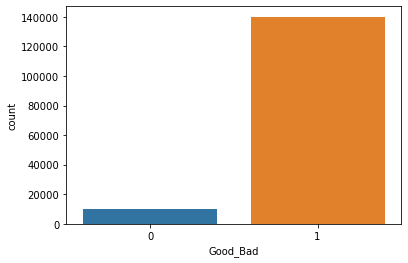

In [15]:
sns.countplot(data.Good_Bad)

# List of Numerical variables:

In [16]:
numerical=[features for features in data.columns if data[features].dtype!='O']
print("Number of numerical variables:",len(numerical))

Number of numerical variables: 12


In [17]:
data[numerical].head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad
0,1.0,0.766127,45.0,9120.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,0
1,0.0,0.957151,40.0,2600.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1
2,0.0,0.658180,38.0,3042.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,1
3,0.0,0.233810,30.0,3300.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,1
4,0.0,0.907239,49.0,63588.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,1


# Discrete Variables

In [18]:
discrete=[features for features in numerical if len(data[features].unique())<25]
print("Discrete variables count:{}".format (len(discrete)))

Discrete variables count:5


In [19]:
data[discrete].head()

,NPA Status,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad
0,1.0,2.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,1
2,0.0,1.0,1.0,0.0,1
3,0.0,0.0,0.0,0.0,1
4,0.0,1.0,0.0,0.0,1


In [20]:
for feature in discrete:
    total_value= len(data[feature].unique())
    print(feature, total_value)

NPA Status 2
NumberOfTime30-59DaysPastDueNotWorse 16
NumberOfTimes90DaysLate 19
NumberOfTime60-89DaysPastDueNotWorse 13
Good_Bad 2


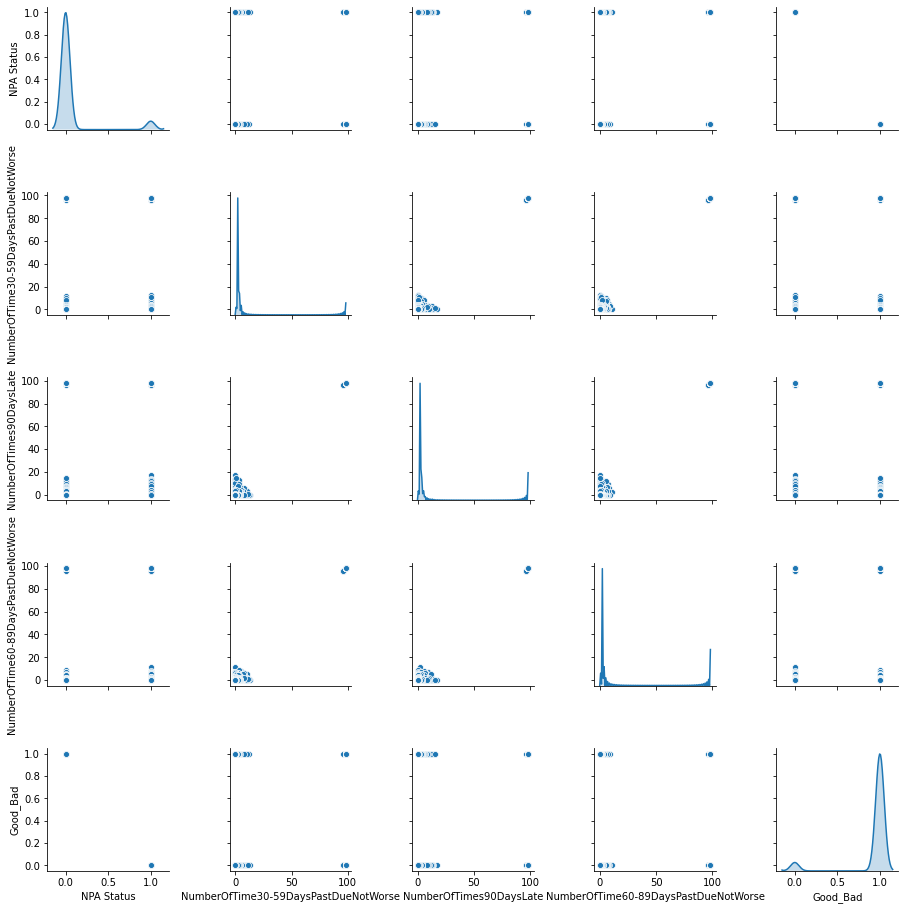

In [21]:
sns.pairplot(data[discrete],diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

# Missing values in discrete feature

In [22]:
#Counting the missing values in Discrete features
data[discrete].isnull().sum()

NPA Status                              0
NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
dtype: int64

# Relationship between discrete features and dependent feature

AttributeError: 'str' object has no attribute 'get'

In [ ]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype(int)

In [ ]:
data["Rented_OwnHouse"]=data['Rented_OwnHouse'].map({'Ownhouse':1,'Rented':0}).astype(int)

In [ ]:
Region=pd.get_dummies(data['Region'],prefix='Region')

In [ ]:
Occupation=pd.get_dummies(data['Occupation'],prefix='Occupation')

In [ ]:
data=pd.concat([data,Region,Occupation],axis=1)

In [ ]:
data=data.drop(['Region','Occupation'],axis=1)
data.head()

In [ ]:
sns.boxplot(data=data).set_title('outlier')

In [ ]:
data['MonthlyIncome']=np.cbrt(data['MonthlyIncome'])

In [ ]:
data['MonthlyIncome'].hist(range=[0,40])

In [ ]:
data['age'].hist()

In [ ]:
y=data[["Good_Bad"]]
y.head

In [ ]:
Bad=data[data['Good_Bad']==0]

In [ ]:
Bad.shape

In [ ]:
Good=data[data['Good_Bad']==1][:10026]
Good.shape

In [ ]:
newdata=pd.concat([Good,Bad])
newdata=newdata.sample(frac=1,random_state=40)
newdata.head()

In [ ]:
x=newdata[['RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'MonthlyIncome', 'Rented_OwnHouse',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Region_Central', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Occupation_Non-officer',
       'Occupation_Officer1', 'Occupation_Officer2', 'Occupation_Officer3',
       'Occupation_Self_Emp']]
x.head

In [ ]:
y=newdata[['Good_Bad']]
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# K Nearest Neighbors Algorithm 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k=np.arange(1,25)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

In [ ]:
k=np.arange(1,25)
k

In [ ]:
plt.subplot(1,2,1)
plt.plot(k,train_accuracy)
plt.xlabel('numbers of neighbor')
plt.ylabel('train accuracy')
plt.show()
plt.subplot(1,2,2)
plt.plot(k,test_accuracy)
plt.ylabel('test accuracy')
plt.show()

In [ ]:
idx=np.where(test_accuracy==max(test_accuracy))
x=k[idx]
x

In [ ]:
model=KNeighborsClassifier(n_neighbors=x[0])
model.fit(x_train,y_train)

In [ ]:
Y_pred=model.predict(x_test)
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,Y_pred)

In [ ]:
model.score(x_train,y_train)

In [ ]:
# Gaussain NB algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB(var_smoothing=0.0000001)
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred[0:5]

In [ ]:
y_test[0:5]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
model.score(x_train,y_train)

In [ ]:
# Naive Base Alorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()
model.fit(x_train,y_train)

In [ ]:
pred=model.predict(x_test)
pred

In [ ]:
model.score(x_test,y_test)

In [ ]:
model.score(x_train,y_train)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
# logistic Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm=LogisticRegression()


In [ ]:
lm.fit(x_train,y_train)

In [ ]:
pred=lm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
#Bagging algorithm

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error